<a href="https://colab.research.google.com/github/IEXE-Tec/analisis_de_algoritmos/blob/main/01_analisis_de_algoritmos_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Algoritmos I

# Complejidad

## Ejercicio Perimetro Cuadrado

In [40]:
import timeit
import time
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,6)})

Alumno I

In [10]:
def per_cuadrado_i(lado=0):
  perimetro = 0
  for l in range(0,4):
    perimetro += lado

  return perimetro

Alumno II

In [11]:
def per_cuadrado_ii(lado=0):
  return lado*4

In [20]:
%time per_cuadrado_i(1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.58 µs


4

In [19]:
%time per_cuadrado_ii(1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.82 µs


4

## Ejercicio 2
Perimetro 

In [28]:
def perimetro_i(l=0, n=0):
  per = 0
  for i in range(0,n):
    per += l

  return per

In [23]:
def perimetro_ii(l=0, n=0):
  return l*n

In [29]:
%time perimetro_i(l=1, n=1000000)

CPU times: user 66.8 ms, sys: 659 µs, total: 67.4 ms
Wall time: 67.6 ms


1000000

In [30]:
%time perimetro_ii(l=1, n=1000000)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs


1000000

### Tiempo en funcion de n

Ahora grafiquemos el tiempo de ejecucion dependiendo del parametro n.

In [35]:
def tiempo_exc(foo, n=0,l=0):
  '''
  foo: funcion a evaluar (perimetro_ii o  i
  n: numero de lados
  l: tamaño del lado

  return: wall time 
  '''
  start_time = time.time()
  foo(n,l)
  end_time = time.time()
  return end_time - start_time

In [47]:
tiempo_i = []
tiempo_ii = []
lista_n = list(range(1, 1000001, 10000))

# Medir tiempos de ejecucion
for nn in lista_n:
  tiempo_i.append(tiempo_exc(perimetro_i, n=nn, l=1))
  tiempo_ii.append(tiempo_exc(perimetro_ii, n=nn, l=1))

# Crear dataframe
df_i = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_i})
df_i['alg'] = 'i'
df_ii = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_ii})
df_ii['alg'] = 'ii'
df = pd.concat([df_i, df_ii], ignore_index=True)
df

,n,tiempo,alg
0,1,4.291534e-06,i
1,10001,1.430511e-06,i
2,20001,9.536743e-07,i
3,30001,1.192093e-06,i
4,40001,1.192093e-06,i
...,...,...,...
195,950001,2.384186e-07,ii
196,960001,7.152557e-07,ii
197,970001,4.768372e-07,ii
198,980001,4.768372e-07,ii


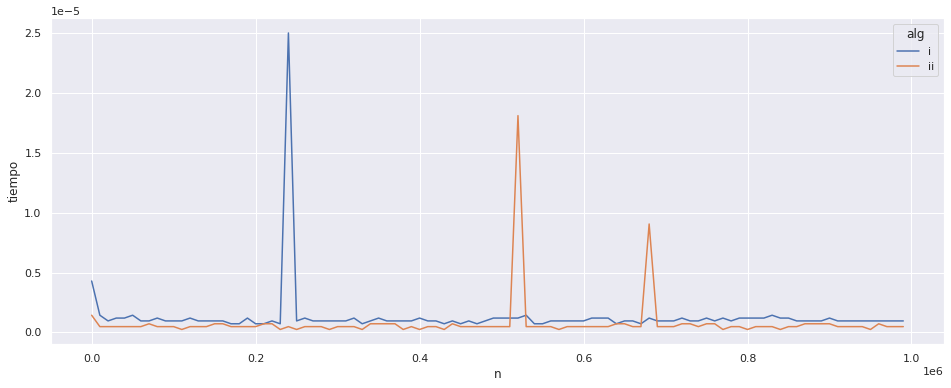

In [48]:
sns.lineplot(data=df, x='n', y='tiempo', hue='alg')

In [84]:
# Varias ejecuciones para los mismos valores de n


for h in range(10000):
  tiempo_i = []
  tiempo_ii = []
  lista_n = list(range(1, 1000000, 1000))
  lista_df = []
  for nn in lista_n:
    tiempo_i.append(tiempo_exc(perimetro_i, n=nn, l=1))
    tiempo_ii.append(tiempo_exc(perimetro_ii, n=nn, l=1))

  # Crear dataframe
  df_i = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_i})
  df_i['alg'] = 'i'
  df_ii = pd.DataFrame({'n':lista_n, 'tiempo':tiempo_ii})
  df_ii['alg'] = 'ii'
  df = pd.concat([df_i, df_ii], ignore_index=True)
  lista_df.append(df)

df = pd.concat(lista_df, ignore_index=True)
df = df.groupby(['n', 'alg'], as_index=False).mean()
df.head()

,n,alg,tiempo
0,1,i,3.337860e-06
1,1,ii,1.192093e-06
2,1001,i,7.152557e-07
3,1001,ii,2.384186e-07
4,2001,i,4.768372e-07


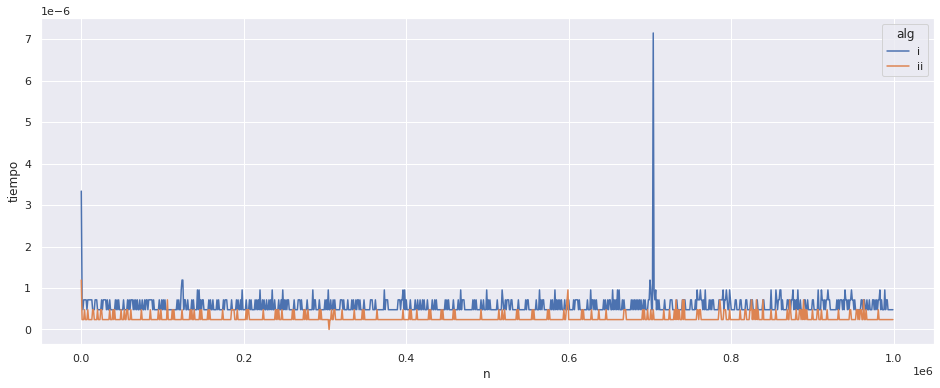

In [85]:
sns.lineplot(data=df, x='n', y='tiempo', hue='alg')

# Notacion Big-O

Veamos algunos ejemplo de la complejidad de algunas funciones aplicada a la lista con valores 1 a n:   
 
```datos=list(range(1, n+1)) ```

In [86]:
def foo_datos(n=10):
  return list(range(1, n+1))

In [88]:
datos = foo_datos(n=10)
datos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Funcion Constante  
$\mathcal{O}(1)$, pues sin importar el tamaño de la lista de valores, el codigo es ejecutado en 1 un paso.

In [89]:
def o_constante(datos):
  print(datos)

In [90]:
o_constante(datos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Funcion lineal
$\mathcal{O}(n)$

En el siguiente bloque el tiempo es lineal en $n$ pues se ejecuta una operacion de suma en cada iteracion del for-loop `for s in datos`.

In [91]:
def o_lineal_suma(datos):
  suma = 0
  for s in datos:
    suma += s

  return suma

In [92]:
o_lineal_suma(datos)

55

Lo mismo pasa en el siguiente bloque. Cada operacion de print o imprimir es ejecutada $n$ veces por eso la complejidad $\mathcal{O}(n)$.

In [93]:
def o_lineal_print(datos):
  for s in datos:
    print(s)

In [94]:
o_lineal_print(datos)

1
2
3
4
5
6
7
8
9
10


## Polinomial de grado 2

$\mathcal{O}(n^2)$

En el siguiente ejemplo la complejidad es polinomial de grado dos, o cuadrada. Pues a cada uno de los $n$ elementos de la lista de le multiplica con cada uno de los $n$ elementos de la misma lista. 
Se crea la variable `acc` en un primer paso. Esto se hace en $\mathcal{O}(1)$.   

Podemos observar que el primer for `for s in datos` itera sobre cada uno de los `n` valores guardatos en `datos`.  
A su vez, tiene otro for anidado `for ss in datos` que itera sobre la misma lista de $n$ objetos.  
 En cada una de estas operaciones se realiza una suma y una multiplicacion `acc += s*ss`.

Esto nos da $2n^2$ operaciones en los loops de la funcion, lo que significa que tiene una complejidad de $ \mathcal{O}(n^2) $.

In [97]:
def o_cuadratica_mult(datos):
  acc = 0
  for s in datos:
    for ss in datos:
      acc += s*ss
  return acc

In [98]:
o_cuadratica_mult(datos)

3025

## Tarea

Encuntra al complejidad asitotica de las siguientes funciones

In [99]:
def o_tarea_1(datos):
  for s in datos:
    print(s)
    pass 

In [100]:
o_tarea_1(datos)

1
2
3
4
5
6
7
8
9
10


In [101]:
def o_tarea_2(datos):
  for s in datos:
    pass 

In [102]:
o_tarea_2(datos)

In [104]:
def o_tarea_3(datos):
  return 0

In [106]:
o_tarea_3(datos)

0

In [116]:
def o_tarea_4(datos):
  acc = 0
  for s in datos:
    for ss in datos:
      for sss in datos:
        acc = acc*sss
        acc -= sss
        acc += sss
  return acc

In [117]:
o_tarea_4(datos)

0

In [114]:
def o_tarea_5(datos):
  acc = 0
  for s in datos:
    for ss in range(1,5):
      acc += s*ss
  return acc

In [118]:
o_tarea_5(datos)

550